<a href="https://colab.research.google.com/github/ThalesMiranda/Triggo.AI/blob/main/TriggoAI_DesafioT%C3%A9cnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# AQUI FAÇO A IMPORTAÇÃO DOS ARQUIVOS DA BASE DE DADOS;
from google.colab import files
uploaded = files.upload()


Saving olist_orders_dataset.csv to olist_orders_dataset.csv
Saving olist_products_dataset.csv to olist_products_dataset.csv
Saving olist_sellers_dataset.csv to olist_sellers_dataset.csv
Saving product_category_name_translation.csv to product_category_name_translation.csv
Saving olist_customers_dataset.csv to olist_customers_dataset.csv
Saving olist_geolocation_dataset.csv to olist_geolocation_dataset.csv
Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv
Saving olist_order_payments_dataset.csv to olist_order_payments_dataset.csv
Saving olist_order_reviews_dataset.csv to olist_order_reviews_dataset.csv


In [35]:
# IMPORTAÇÃO DO PANDAS E ATRIBUIÇÃO DOS DADOS

import pandas as pd

# Carregando os dados
customers = pd.read_csv("olist_customers_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")

In [4]:
# TESTE PARA VER SE ESTÁ FUNCIONANDO
products.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
# FUNÇÃO PARA VERIFICAR OS NULOS
def check_missing(df):
    return df.isnull().sum()[df.isnull().sum() > 0]

# CHECANDO NOS DATASETS:

print("Clientes:")
print(check_missing(customers), "\n")

print("Pedidos:")
print(check_missing(orders), "\n")

print("Itens do pedido:")
print(check_missing(order_items), "\n")

print("Pagamentos:")
print(check_missing(order_payments), "\n")

print("Avaliações:")
print(check_missing(order_reviews), "\n")

print("Produtos:")
print(check_missing(products), "\n")

print("Vendedores:")
print(check_missing(sellers), "\n")

print("Categorias traduzidas:")
print(check_missing(category_translation), "\n")

Clientes:
Series([], dtype: int64) 

Pedidos:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64 

Itens do pedido:
Series([], dtype: int64) 

Pagamentos:
Series([], dtype: int64) 

Avaliações:
review_comment_title      87656
review_comment_message    58247
dtype: int64 

Produtos:
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

Vendedores:
Series([], dtype: int64) 

Categorias traduzidas:
Series([], dtype: int64) 



In [6]:
# ESSES REGISTROS FORAM MANTIDOS PARA SEREM USADOS POSTERIORMENTE PARA CLASSIFICAR OS PEDIDOS (CANCELADOS, ENTREGUES, ETC)
orders[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().sum()


,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965


In [7]:
# JULGO QUE REVIWS SÃO VÁLIDAS MESMO SEM TEXTO
order_reviews[['review_comment_title', 'review_comment_message']].isnull().sum()


,0
review_comment_title,87656
review_comment_message,58247


In [8]:
products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [9]:
# EXCLUINDO PRODUTOS QUE NÃO POSSUEM INFORMAÇÕES BASE
products = products.dropna(subset=[
    'product_category_name',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty'
])

# PRODUTOS SEM DIMENSÃO QUE IMPOSSIBILITAM OPERAÇÕES FUTURAS
products = products.dropna(subset=[
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
])


In [10]:
# CONVERSÕES DE DATA:

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])

order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])



In [11]:
# TRANSFORMAÇÃO DE TEXTOS REPETIDOS EM CATEGORIAS:
customers['customer_state'] = customers['customer_state'].astype('category')
sellers['seller_state'] = sellers['seller_state'].astype('category')
products['product_category_name'] = products['product_category_name'].astype('category')


In [12]:
# UNIFICANDO AS TABELAS
df_merged = orders.merge(customers, on='customer_id', how='left')
df_merged = df_merged.merge(order_items, on='order_id', how='left')
df_merged = df_merged.merge(order_payments, on='order_id', how='left')
df_merged = df_merged.merge(order_reviews, on='order_id', how='left')
df_merged = df_merged.merge(products, on='product_id', how='left')
df_merged = df_merged.merge(sellers, on='seller_id', how='left')
df_merged = df_merged.merge(category_translation, on='product_category_name', how='left')

# A TABELA df_merged GERADA CENTRALIZA AS PRINCIPAIS INFORMAÇÕES, FACILITANDO A ANALISE FUTURA.

In [13]:
# REMOVENDO DUPLICATAS
print("Duplicatas:", df_merged.duplicated().sum())
df_merged.drop_duplicates(inplace=True)


Duplicatas: 0


In [15]:
!pip install pandasql


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=63fce4987f95d54585d8a002889d9da30b4706097d1bb8d3d3d79c72d463a570
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [16]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

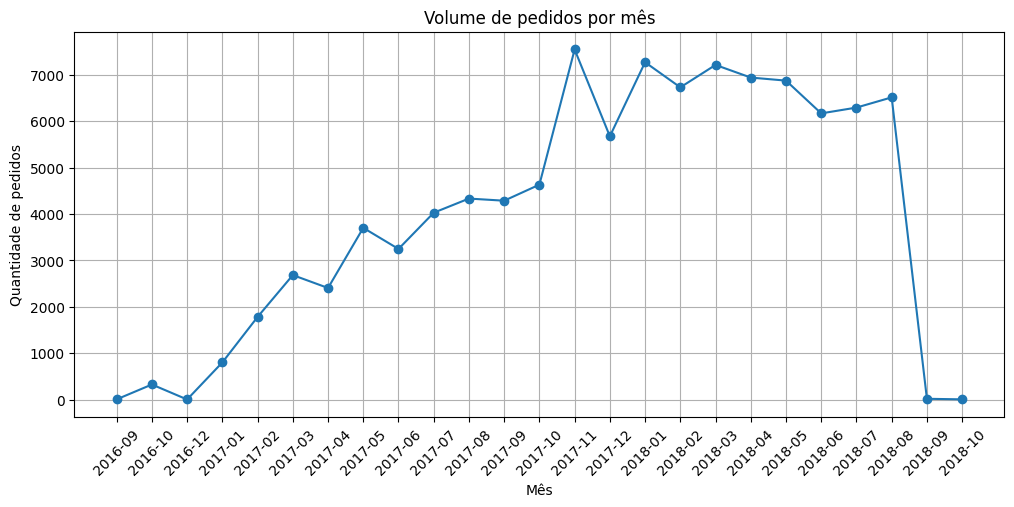

In [17]:
# a) Volume de pedidos por mês + Sazonalidade

orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = orders.groupby('order_month')['order_id'].nunique().reset_index()
monthly_orders['order_month'] = monthly_orders['order_month'].astype(str)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(monthly_orders['order_month'], monthly_orders['order_id'], marker='o')
plt.xticks(rotation=45)
plt.title('Volume de pedidos por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de pedidos')
plt.grid(True)
plt.show()


In [19]:
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M').astype(str)


In [20]:
query = """
SELECT strftime('%Y-%m', order_purchase_timestamp) AS order_month,
       COUNT(DISTINCT order_id) AS order_count
FROM orders
GROUP BY order_month
ORDER BY order_month
"""
pysqldf(query)


,order_month,order_count
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


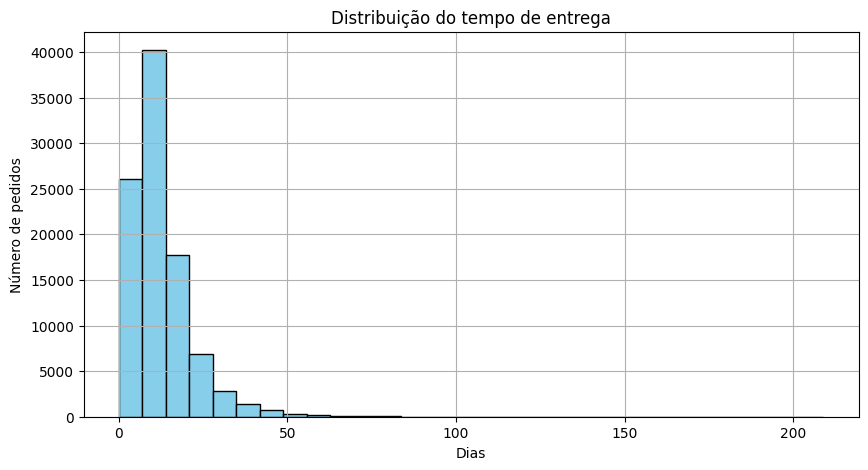

In [21]:
# b) Distribuição do tempo de entrega dos pedidos
df_entrega = orders.copy()
df_entrega = df_entrega.dropna(subset=['order_delivered_customer_date', 'order_purchase_timestamp'])
df_entrega['delivery_time'] = (df_entrega['order_delivered_customer_date'] - df_entrega['order_purchase_timestamp']).dt.days

plt.figure(figsize=(10,5))
plt.hist(df_entrega['delivery_time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do tempo de entrega')
plt.xlabel('Dias')
plt.ylabel('Número de pedidos')
plt.grid(True)
plt.show()



In [22]:
query = """
SELECT (julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp)) AS delivery_time
FROM orders
WHERE order_delivered_customer_date IS NOT NULL
"""
pysqldf(query)


,delivery_time
0,8.436574
1,13.782037
2,9.394213
3,13.208750
4,2.873877
...,...
96471,8.218009
96472,22.193727
96473,24.859421
96474,17.086424


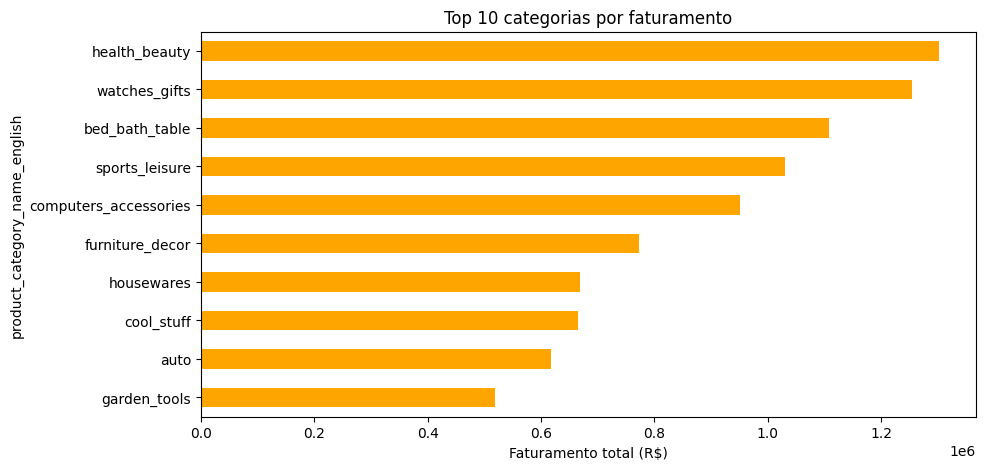

In [23]:
# d) Categorias mais vendidas em termos de faturamento
cat_revenue = df_merged.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
cat_revenue.plot(kind='barh', color='orange')
plt.title('Top 10 categorias por faturamento')
plt.xlabel('Faturamento total (R$)')
plt.gca().invert_yaxis()
plt.show()



In [24]:
query = """
SELECT product_category_name_english, SUM(price) AS total_revenue
FROM df_merged
GROUP BY product_category_name_english
ORDER BY total_revenue DESC
LIMIT 10
"""
pysqldf(query)


,product_category_name_english,total_revenue
0,health_beauty,1301947.97
1,watches_gifts,1254322.95
2,bed_bath_table,1107249.09
3,sports_leisure,1029603.88
4,computers_accessories,950053.69
5,furniture_decor,772096.17
6,housewares,668880.94
7,cool_stuff,664637.13
8,auto,618395.50
9,garden_tools,519473.33


<ipython-input-25-89c41c313806>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_avg = df_merged.groupby('customer_state')['price'].mean().sort_values(ascending=False)


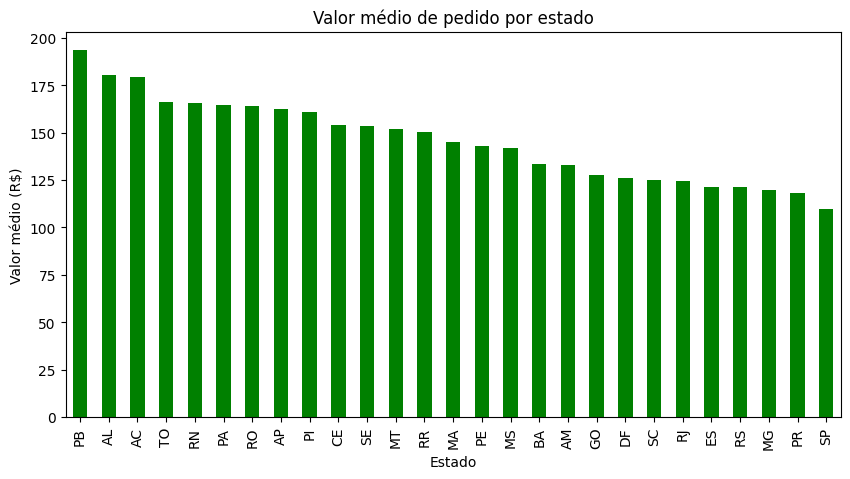

In [25]:
#e) Estados com maior valor médio de pedido
state_avg = df_merged.groupby('customer_state')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
state_avg.plot(kind='bar', color='green')
plt.title('Valor médio de pedido por estado')
plt.ylabel('Valor médio (R$)')
plt.xlabel('Estado')
plt.show()


In [26]:
query = """
SELECT customer_state, AVG(price) AS avg_order_value
FROM df_merged
GROUP BY customer_state
ORDER BY avg_order_value DESC
"""
pysqldf(query)


,customer_state,avg_order_value
0,PB,193.462875
1,AL,180.334026
2,AC,179.573053
3,TO,165.934838
4,RN,165.688021
5,PA,164.639297
6,RO,164.209895
7,AP,162.551190
8,PI,160.675436
9,CE,154.302783


In [ ]:
#SOLUÇÕES DE PROBLEMAS DE NEGÓCIO

In [28]:
# Análise de Retenção

# PEDIDOS POR CLIENTE
pedidos_por_cliente = orders.groupby("customer_id").order_id.nunique().reset_index()
pedidos_por_cliente.columns = ["customer_id", "num_pedidos"]

# RECORRENTES:
clientes_recorrentes = pedidos_por_cliente[pedidos_por_cliente["num_pedidos"] > 1]
taxa_recorrencia = len(clientes_recorrentes) / pedidos_por_cliente.shape[0]

print(f"TAXA DE CLIENTES RECORRENTS: {taxa_recorrencia:.2%}")

## ATRAVÉS DESTESS DADOS, PODEMOS DEFINIR ESTRATÉGIAS DE FIDELIZAÇÃO OU CAMPANHAS DE REMARKETING


TAXA DE CLIENTES RECORRENTS: 0.00%


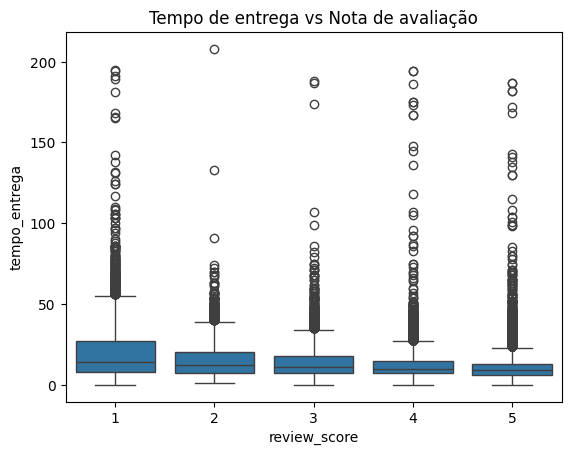

product_category_name
cds_dvds_musicais                     4.642857
fashion_roupa_infanto_juvenil         4.500000
livros_interesse_geral                4.446266
construcao_ferramentas_ferramentas    4.444444
flores                                4.419355
livros_importados                     4.400000
livros_tecnicos                       4.368421
alimentos_bebidas                     4.315412
malas_acessorios                      4.315257
portateis_casa_forno_e_cafe           4.302632
Name: review_score, dtype: float64


<ipython-input-32-53f1caa16849>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nota_por_categoria = df_avaliacao.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)


In [32]:
# ANÁLISE DE SATISFAÇÃO:
df_avaliacao = order_reviews.merge(order_items, on='order_id').merge(products, on='product_id').merge(orders, on='order_id')
df_avaliacao['tempo_entrega'] = (pd.to_datetime(df_avaliacao['order_delivered_customer_date']) - pd.to_datetime(df_avaliacao['order_purchase_timestamp'])).dt.days
import seaborn as sns

sns.boxplot(data=df_avaliacao, x='review_score', y='tempo_entrega')
plt.title('Tempo de entrega vs Nota de avaliação')
plt.show()
nota_por_categoria = df_avaliacao.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)
print(nota_por_categoria.head(10))


In [33]:
# INVESTIR MAIS EM PRODUTOS COM NOTA ALTA MAS BAIXA ENTREGA

# REVISAR PRODUTOS COM BAIXA NOTA


In [40]:
import pandas as pd
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_category_translation = pd.read_csv('product_category_name_translation.csv')


In [ ]:
# Dashboard Geral: Evolução das Vendas ao Longo do Tempo

In [41]:
import plotly.express as px

df_vendas = df_orders.merge(df_items, on='order_id').merge(df_products, on='product_id').merge(df_customers, on='customer_id')
df_vendas['order_month'] = pd.to_datetime(df_vendas['order_purchase_timestamp']).dt.to_period('M').astype(str)

vendas_mensal = df_vendas.groupby(['order_month', 'customer_state', 'product_category_name'])['order_id'].nunique().reset_index()
vendas_mensal.rename(columns={'order_id': 'num_vendas'}, inplace=True)

fig = px.line(vendas_mensal,
              x='order_month', y='num_vendas',
              color='product_category_name',
              facet_col='customer_state',
              title='Evolução das Vendas por Estado e Categoria')
fig.update_layout(height=600)
fig.show()


In [44]:
# Relação entre Avaliação e Tempo de Entrega

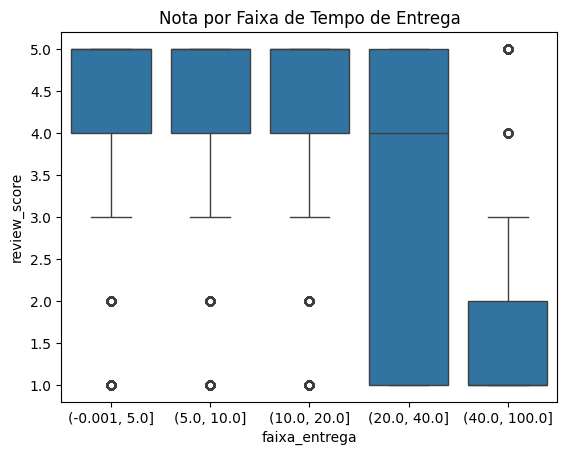

In [43]:
df_avaliacao = df_orders.merge(df_reviews, on='order_id')
df_avaliacao['tempo_entrega'] = (pd.to_datetime(df_avaliacao['order_delivered_customer_date']) - pd.to_datetime(df_avaliacao['order_purchase_timestamp'])).dt.days

# Scatterplot
fig = px.scatter(df_avaliacao,
                 x='tempo_entrega', y='review_score',
                 trendline='ols',
                 title='Relação entre Tempo de Entrega e Avaliação do Cliente')
fig.show()

df_avaliacao['faixa_entrega'] = pd.cut(df_avaliacao['tempo_entrega'], bins=[0, 5, 10, 20, 40, 100], include_lowest=True)
sns.boxplot(data=df_avaliacao, x='faixa_entrega', y='review_score')
plt.title("Nota por Faixa de Tempo de Entrega")
plt.show()
